#Ecuación de la recta.
Recodatorio:
Si tenemos dos puntos$(x_1,y_1)$ y $(x_2,y_2)$. Podemos generar la recta $L=\{(x,y) \in ℜ^2 / y=(\frac{y_2-y_1}{x_2-x_1})(x-x_1)+y_1 \}$.

Al valor $m = \frac{y_2-y_1}{x_2-x_1}$ se le conoce como pendiente de la recta o *slope* en inglés (es común encontrar en paquetes el término slope, cómo PCA).

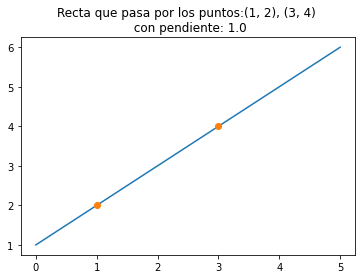

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 3]) # x1, x2
y = np.array([2, 4]) # y1, y2

def slope(x1, y1, x2, y2):
    if x1 == x2:
        raise ValueError('Los puntos tienen la misma coordenada x')
    return (y2 - y1) / (x2 - x1)

def line_equation(m, x1, y1):
    return lambda x: m * (x - x1) + y1

x_new = np.linspace(0,5,10)
y_new = line_equation(slope(x[0],y[0],x[1],y[1]),x[0],y[0])(x_new)

plt.plot(x_new, y_new)
plt.plot(x, y,'o')
plt.title(f'Recta que pasa por los puntos:{(x[0],y[0])}, {(x[1],y[1])} \n con pendiente: {slope(x[0],y[0],x[1],y[1])}')
plt.show()

#Interpolación Lineal.
La interpolación lineal es un caso particular de la interpolación general de Newton.
Con el polinomio de interpolación de Newton se logra aproximar un valor de la función f(x) en un valor desconocido de x.
El caso particular, para que una interpolación sea lineal es en el que se utiliza un polinomio de interpolación de grado 1, que se ajusta a los valores en los puntos $x_{1}$ y $x_{2}$. Se denota de la siguiente manera:

$f(x | x_1;x_2) = f(x_1)+\frac{f(x_2)-f(x_1)}{x_2-x_1}(x-x_1)$

para $x_1 < x < x_2$.

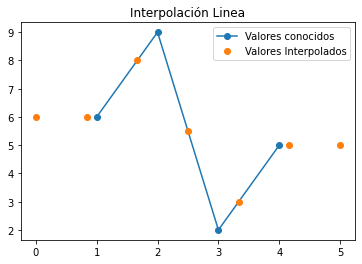

In [2]:
# Puntos conocidos
x = np.array([1,2,3,4])
y = np.array([6,9,2,5]) 

# Valor desconocido
x_new = np.linspace(0,5,7)

# Interpolación lineal. Nota es posible cambiar el tipo de interpolacion
y_new = np.interp(x_new, x, y)

plt.plot(x,y, '-o', label='Valores conocidos')
plt.plot(x_new,y_new,'o', label='Valores Interpolados')
plt.title(f"Interpolación Linea")
plt.legend()
plt.show()

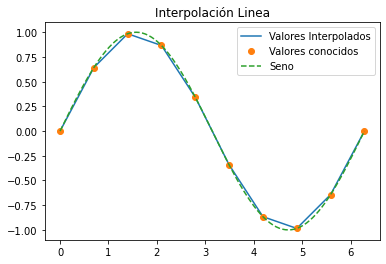

In [3]:
# Puntos conocidos
x = np.linspace(0,2*np.pi,10)
y = np.sin(x) 

# Valor desconocido
x_new = np.linspace(0,np.pi*2,201)

# Interpolación lineal. Nota es posible cambiar el tipo de interpolacion
y_new = np.interp(x_new, x, y)

#Grafica
plt.plot(x_new,y_new,'-', label='Valores Interpolados')
plt.plot(x,y, 'o', label='Valores conocidos')
plt.plot(x_new, np.sin(x_new), '--', label='Seno')
plt.title(f"Interpolación Linea")
plt.legend()
plt.show()

#Polinomio de Newton

Para generar la Interpolación polinómica de Newton debemos calcular:

$f_i(x_0, …,x_i) = \frac{f_{i-1}(x_1, …, x_{i})-f_{i-1}(x_0, …, x_{i-1})}{x_i-x_0}$

Además tenemos que calcular el polinomio cómo:

$p_i(x) = p_{i-1}(x)+f_{i}(x_0, …, x_{i}) Π_{j=0}^{i-1}(x-x_j)$

https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Newton

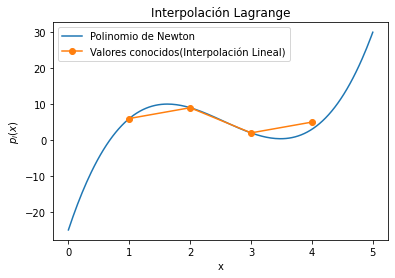

In [4]:
x = np.array([1,2,3,4])
y = np.array([6,9,2,5])

def divididas_diferencias(x, y):
    n = len(x)
    coef = y.copy()
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x[i] - x[i-j])            
    return coef

coef = divididas_diferencias(x, y)
#print(coef)
def newton_interpolation(x, y, coef, x_new):
    n = len(x)
    p = coef[n-1]
    for i in range(n-2, -1, -1):
        p = coef[i] + (x_new - x[i]) * p
    return p

x_new = np.linspace(0, 5, 201)
y_new = [newton_interpolation(x, y, coef, xi) for xi in x_new]

plt.plot(x_new, y_new, label='Polinomio de Newton')
plt.legend()

plt.plot(x, y, '-o', label='Valores conocidos(Interpolación Lineal)')
plt.legend()
plt.xlabel('x')
plt.ylabel('$p_i(x)$')
plt.title('Interpolación Lagrange')
plt.show()

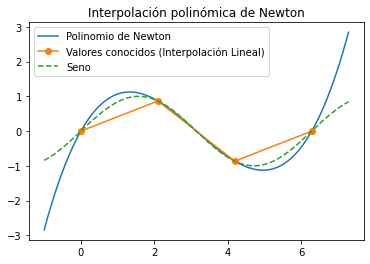

In [5]:

x = np.linspace(0,2*np.pi,4) # Este es el n= que hay que buscar.
y = np.sin(x) # Para la tarea sustituye por cos(x), o tan(x)

def divididas_diferencias(x, y):
    n = len(x)
    coef = y.copy()
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x[i] - x[i-j])            
    return coef

coef = divididas_diferencias(x, y)

def newton_interpolation(x, y, coef, x_new):
    n = len(x)
    p = coef[n-1]
    for i in range(n-2, -1, -1):
        p = coef[i] + (x_new - x[i]) * p
    return p

x_new = np.linspace(-1, 2*np.pi+1, 100)
y_new = [newton_interpolation(x, y, coef, xi) for xi in x_new]

plt.plot(x_new, y_new, label='Polinomio de Newton')
plt.legend()

plt.plot(x, y, '-o', label='Valores conocidos (Interpolación Lineal)')
plt.legend()

plt.plot(x_new, np.sin(x_new), '--', label='Seno')
plt.title('Interpolación polinómica de Newton')
plt.legend()

plt.show()

#Polinomio de Lagrange:

Es un método que permite encontrar un polinomio que interpola un conjunto de puntos mediante un sistema de ecuaciones.
El grado del polinomio resultante depende directamente de la cantidad de puntos dada y se verá en algunos ejemplos que la cantidad de puntos puede generar oscilaciones indeseadas en las curvas generadas dependiendo de la naturaleza de las funciones.

Dado un conjunto de $k + 1$ puntos, es decir, $\{(x_i,y_i)/ i=0,…,k \}$

donde todos los $x_j$ se asumen distintos, el polinomio interpolador en la forma de Lagrange es la combinación lineal:

$L(x) = Σ_{j=0}^{k}y_jl_j(x)$

con:

$l_j(x)=Π_{i=0, i\neq j}^k \frac{x-x_i}{x_j-x_i}$

Polinomio de Lagrange: 
10*x**3/3 - 25*x**2 + 164*x/3 - 27


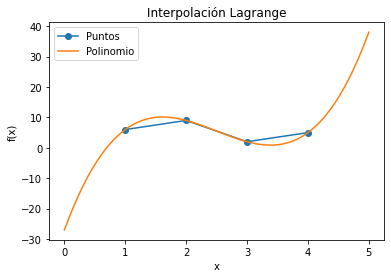

In [6]:
import sympy as sym

# INGRESO , Datos de prueba
xi = np.array([1,2,3,4])
fi = np.array([6,9,2,5])
#xi = np.array([0, 0.5, 1, 2])
#fi = np.array([2, 1.5, 1, 3])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()
# para evaluación numérica
px = sym.lambdify(x,polisimple)
# Puntos para la gráfica
muestras = 201
a = np.min(xi)-1
b = np.max(xi)+1
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o-', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolación Lagrange')
plt.show()

Polinomio de Lagrange: 
1.3104130445179e-6*x**9 - 7.41021118888621e-5*x**8 + 0.0016974439073546*x**7 - 0.0200493787835818*x**6 + 0.12861432607388*x**5 - 0.437043768848138*x**4 + 0.778347810619388*x**3 - 1.10392962493393*x**2 + 1.52467341773116*x


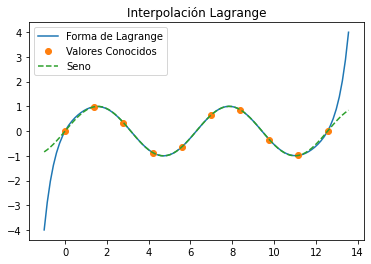

In [7]:
#Lagrange para la funcion seno
xi = np.linspace(0,4*np.pi,10)
fi = np.sin(xi)

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()
# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 100
a = np.min(xi)-1
b = np.max(xi)+1
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(pxi,pfi, label = 'Forma de Lagrange')
plt.plot(xi,fi,'o', label = 'Valores Conocidos')
plt.plot(pxi, np.sin(pxi), '--', label='Seno')
plt.legend()
plt.title('Interpolación Lagrange')
plt.show()

#Splines
En matemáticas, una Spline es una curva suave definida por segmentos de polinomios. La idea es que se construye una función continua por partes que es fácil de calcular y que pasa por un conjunto de puntos de datos conocidos.

Una spline cúbica es una spline en la que cada segmento se define mediante un polinomio cúbico, es decir, un polinomio de tercer grado. Estas splines son particularmente útiles porque son lo suficientemente simples como para calcularlas rápidamente, pero lo suficientemente suaves como para ajustarse bien a los datos.

Las splines se utilizan a menudo como una alternativa a los métodos de interpolación tradicionales, como los polinomios de Lagrange o Newton, ya que pueden ser más estables y menos propensos a sufrir oscilaciones excesivas entre los puntos de datos. También son útiles cuando los datos tienen ruido o no son uniformemente espaciados.

https://youtu.be/KPoeNZZ6H4s Interpolación para animación.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BSpline.html#scipy.interpolate.BSpline #Implementación usando scipy.


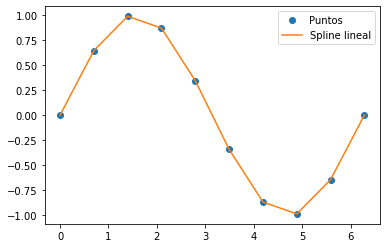

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los puntos que queremos que el spline pase
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

# Definir la función del spline lineal
def linear_spline(x, y, x_eval):
    y_eval = np.zeros_like(x_eval)
    for i, x_i in enumerate(x_eval):
        j = np.searchsorted(x, x_i)
        if j == 0:
            y_eval[i] = y[0]
        elif j == len(x):
            y_eval[i] = y[-1]
        else:
            x_left, x_right = x[j-1], x[j]
            y_left, y_right = y[j-1], y[j]
            m = (y_right - y_left) / (x_right - x_left)
            y_eval[i] = y_left + m * (x_i - x_left)
    return y_eval

# Definir los puntos de evaluación del spline lineal
x_eval = np.linspace(0, 2*np.pi, 100)

# Calcular los valores del spline lineal
y_eval = linear_spline(x, y, x_eval)

# Graficar los puntos originales y el spline lineal
plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_eval, y_eval, label='Spline lineal')
plt.legend()
plt.show()


(array([0.        , 0.        , 0.        , 0.        , 3.14159265,
       6.28318531, 6.28318531, 6.28318531, 6.28318531]), array([ 4.99185041e-17,  1.77777778e+00,  2.96431546e-16, -1.77777778e+00,
       -2.44929360e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00]), 3)


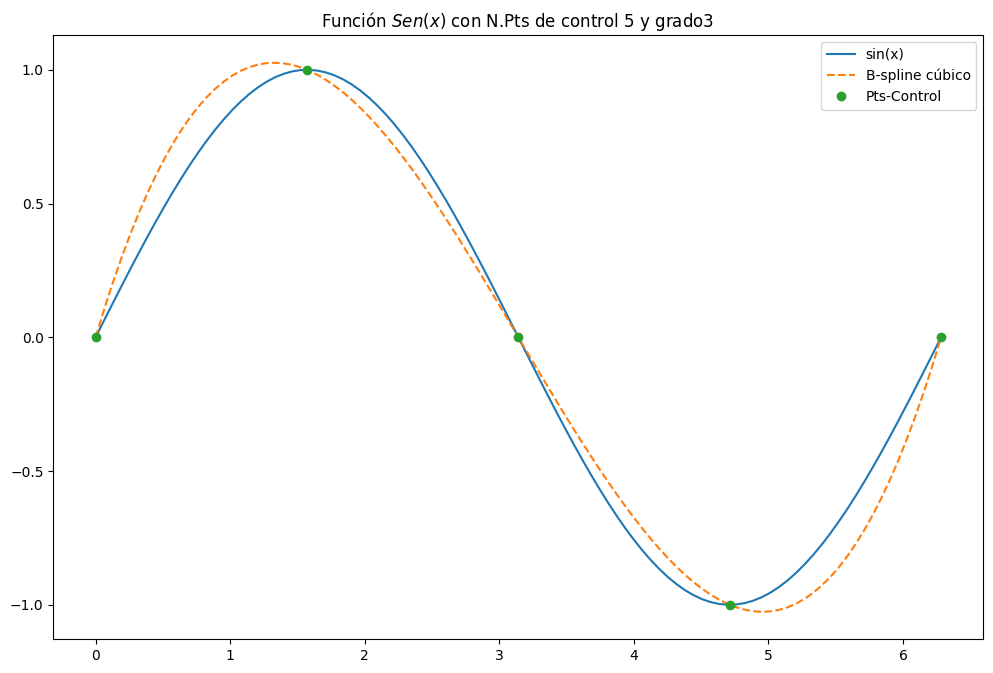

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep

plt.figure(figsize=(12,8),dpi=100)
# Definir la función de evaluación del B-spline cúbico
def bspline_cubic(x, knots, coeffs,grado):
    tck = (knots, coeffs, grado)
    return splev(x, tck)

# Definir los puntos de control del B-spline cúbico
n_control = 5
t = np.linspace(0, 2*np.pi, n_control) # x
c = np.sin(t) # f(x)

# Definir los puntos de evaluación del B-spline cúbico
n_eval = 100
x_eval = np.linspace(0, 2*np.pi, n_eval)

# Calcular los coeficientes del B-spline cúbico
grado = 3
spl = splrep(t, c, k=grado)
print(spl)
# Evaluar el B-spline cúbico
y_eval = bspline_cubic(x_eval, spl[0], spl[1], grado)

# Graficar la función y el B-spline cúbico
plt.plot(x_eval, np.sin(x_eval), label='sin(x)')
plt.plot(x_eval, y_eval,'--', label='B-spline cúbico')
plt.plot(t, c,'o', label='Pts-Control')
plt.legend()
plt.title(f'Función $Sen(x)$ con N.Pts de control {n_control} y grado{grado} ')
plt.show()



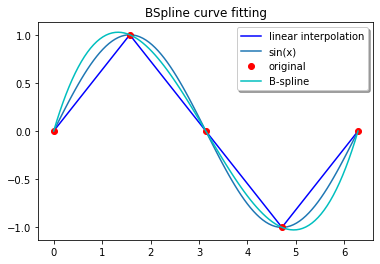

In [26]:
from scipy import interpolate

# Datos de la función seno
x = np.linspace(0, 2*np.pi, 5)
y = np.sin(x)

#Grafica de datos Originales

plt.plot(x, y, 'b', label="linear interpolation")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)

#Interpolación usando splrep.
tck = interpolate.splrep(x, y, s=0, k=3)
x_new = np.linspace(min(x), max(x), 100)
y_fit = interpolate.BSpline(*tck)(x_new)
plt.plot(x_eval, np.sin(x_eval), label='sin(x)')
plt.title("BSpline curve fitting")
plt.plot(x, y, 'ro', label="original")
plt.plot(x_new, y_fit, '-c', label="B-spline")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show() 


In [24]:
*tck

SyntaxError: ignored